<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

## Practical Work 2
# **Prepaied by Dr. Hatem el-attar **

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

# **Step_1 :** Import numpy, matplotlib.pyplot and make it inline

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

**Step_2:** To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
 <b>yi = a*xi + b (and a = -2, b = 1)</b>


In [45]:
a=-2
b=1
x=np.random.uniform(0,20,1000)
y=a*x+b

In [22]:
print(stats.describe(x))
print(stats.describe(y))

DescribeResult(nobs=1000, minmax=(0.021052827305052535, 19.979192688139005), mean=9.946027258040962, variance=34.31165979467555, skewness=0.004499703888001713, kurtosis=-1.2402422270253999)
DescribeResult(nobs=1000, minmax=(-38.95838537627801, 0.9578943453898949), mean=-18.892054516081924, variance=137.2466391787022, skewness=-0.004499703888001713, kurtosis=-1.2402422270253999)


Step_3: plot x and y

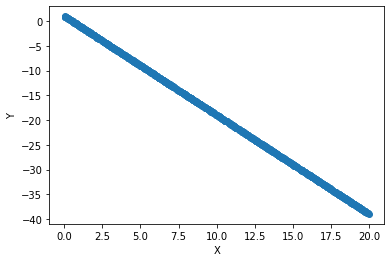

In [23]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### **Step_4:** Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [24]:
def gradientDesc(x,y,alpha,max_iters):
    m=len(x)
    theta_0=0
    theta_1=0
    theta0_list=[]
    theta1_list=[]
    cost_func=0
    loss_list=[]
    y_predict=[]
    y_predict_list=[]
    for i in range(max_iters):
        y_predict=theta_0+theta_1*x
        y_predict_list.append(y_predict)
        cost_func=(1/(2*m))*sum((y_predict-y)**2)
        loss_list.append(cost_func)
        gradient_0=(1/m)*sum(y_predict-y)
        gradient_1=(1/m)*sum((y_predict-y)*x)
        theta_0=theta_0-alpha*gradient_0
        theta0_list.append(theta_0)
        theta_1=theta_1-alpha*gradient_1
        theta1_list.append(theta_1)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1



#### **Step_5:** Try your function with any input parameters of your choice.

In [25]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1=gradientDesc(x,y,0.01,1000)
print(f"all theta0 through iterations : \n {theta0_list}")
print(f"all theta1 through iterations : \n {theta1_list}")
print(f"The loss function through iterations : \n {loss_list}")
print(f"The hyposthesis output for all iterations : \n {y_predict_list}")
print(f"The optimum theta_0 = {theta_0}")
print(f"The optimum theta_1 = {theta_1}")


all theta0 through iterations : 
 [-0.18892054516081896, -0.12088046053665094, -0.14007541377797147, -0.12966850401410013, -0.12931987488392038, -0.1255669047987117, -0.12297944177932033, -0.12000623013153827, -0.11717381676223003, -0.11430344062742614, -0.11145575682644768, -0.10861015095252578, -0.10577359551569752, -0.10294369873872435, -0.10012124760620963, -0.09730595013895299, -0.09449788067450063, -0.09169698926794484, -0.08890326822516996, -0.08611669557314666, -0.08333725424872257, -0.08056492558484556, -0.07779969152149813, -0.07504153385503766, -0.07229043449284754, -0.06954637536673655, -0.06680933846217653, -0.06407930580821905, -0.0613562594807601, -0.05864018160127416, -0.055931054337086575, -0.05322885990112412, -0.05053358055184328, -0.04784519859309831, -0.04516369637403038, -0.042489056288949896, -0.039821260777221444, -0.03716029232314839, -0.03450613345585786, -0.03185876674918606, -0.029218174821563813, -0.026584340335902533, -0.023957245999480344, -0.021336874563

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### **Step_6:** Calculate r2 score

In [26]:
y_predict=theta_0+theta_1*x
y_mean=np.mean(y)
ss_tot=sum((y-y_mean)**2)
ss_res=sum((y-y_predict)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  0.9999854091663306


#### **Step_7:** Plot loss vs. epochs

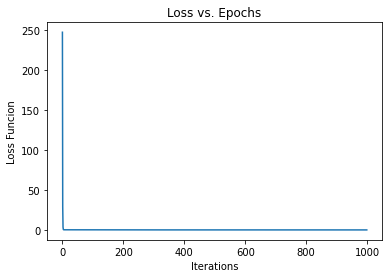

In [27]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

#### **Step_8:** Plot Theta_0 vs. loss and Theta_1 vs. loss

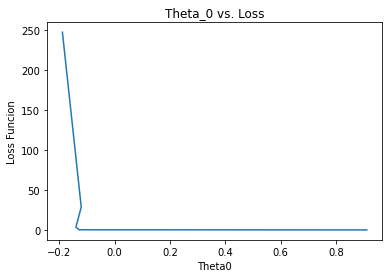

In [28]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

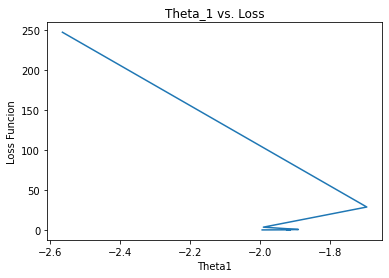

In [29]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

#### **Step_9:** Plot all regression lines till converge

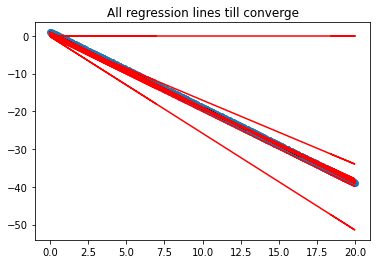

In [30]:
plt.scatter(x,y,label='observed data')
for i in range(len(y_predict_list)):
    plt.plot(x,y_predict_list[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

#### **[Step_10:](https://)** Plot the best regression line

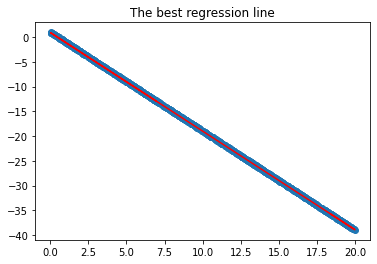

In [31]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

#### **Step_11:** Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [32]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1=gradientDesc(x,y,0.001,100)
print(f"all theta0 through iterations : \n {theta0_list}")
print(f"all theta1 through iterations : \n {theta1_list}")
print(f"The loss function through iterations : \n {loss_list}")
print(f"The hyposthesis output for all iterations : \n {y_predict_list}")
print(f"The optimum theta_0 = {theta_0}")
print(f"The optimum theta_1 = {theta_1}")

all theta0 through iterations : 
 [-0.018892054516081894, -0.03521450273431395, -0.0493115403223466, -0.061481259690978195, -0.07198182529028532, -0.08103682175633024, -0.08883988570089248, -0.0955587170965878, -0.1013385533574085, -0.1063051780838931, -0.11056752680222502, -0.11421994367786834, -0.11734413595392108, -0.12001086660241879, -0.12228142025362843, -0.12420887277158955, -0.12583919077648667, -0.12721218389160716, -0.1283623294416758, -0.1293194866870533, -0.13010951538990634, -0.13075481152659416, -0.13127477124411271, -0.13168619267193954, -0.13200362391323112, -0.1322396644243742, -0.1324052260262832, -0.1325097589545654, -0.13256144763141947, -0.1325673802148866, -0.13253369543784407, -0.13246570977866462, -0.13236802759801444, -0.13224463652338891, -0.13209899005737605, -0.13193407912096455, -0.1317524940139905, -0.13155647807629822, -0.13134797416126237, -0.13112866488441868, -0.130900007480996, -0.13066326399445954, -0.13041952742145282, -0.13016974435475798, -0.12991

In [33]:
y_predict=theta_0+theta_1*x
y_mean=np.mean(y)
ss_tot=sum((y-y_mean)**2)
ss_res=sum((y-y_predict)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  0.9976693736366196


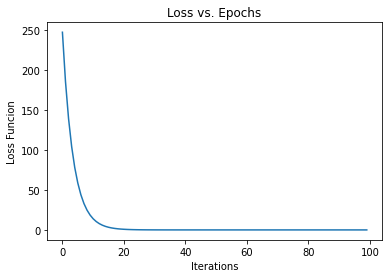

In [34]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

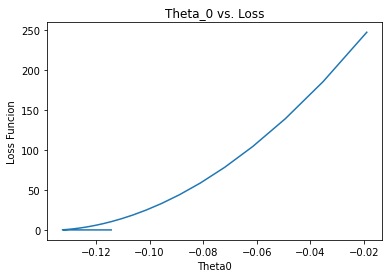

In [35]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

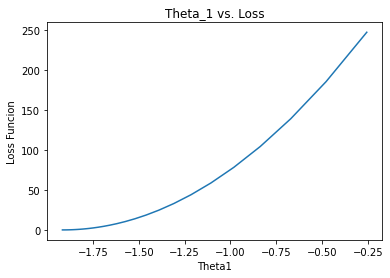

In [36]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

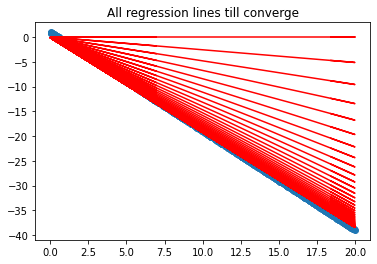

In [37]:
plt.scatter(x,y,label='observed data')
for i in range(0,len(y_predict_list)):
    plt.plot(x,y_predict_list[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

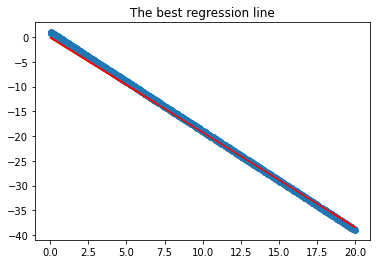

In [38]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

#### **Step_12:** Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [52]:
def miniBatchGD(x,y,alpha,b,epochs): # b >>> is batch size
    u=int(len(x)/b)   # u -------> no of mini batches / no of updates
    theta_0=0
    theta_1=0
    theta0_list=[]
    theta1_list=[]
    cost_func=0
    loss_list=[]
    y_predict=[]
    y_predict_list=[]
    x_list=[]
    for i in range(epochs): 
        for j in range(u): 
            y_predict = theta_0 + theta_1 * x[j*b:(j+1)*b]
            y_predict_list.append(y_predict)
            x_list.append(x[j*b:(j+1)*b])
            theta0_grd = (1/b) * np.sum(y_predict - y[j*b:(j+1)*b])
            theta1_grd = (1/b) * np.sum((y_predict - y[j*b:(j+1)*b]) * x[j*b:(j+1)*b])
            theta_0 = theta_0 - alpha * theta0_grd
            theta0_list.append(theta_0)
            theta_1 = theta_1 - alpha * theta1_grd
            theta1_list.append(theta_1)
            cost_func=(1/(2*b))*sum((y_predict-y[j*b:(j+1)*b])**2)
            loss_list.append(cost_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,x_list

In [53]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,x_list=miniBatchGD(x,y,0.01,32,100)
print(f"all theta0 through all updates : \n {theta0_list}")
print(f"all theta1 through all updates : \n {theta1_list}")
print(f"The loss function through updates : \n {loss_list}")
print(f"The hyposthesis output for all updates : \n {y_predict_list}")
print(f"The optimum theta_0 = {theta_0}")
print(f"The optimum theta_1 = {theta_1}")


all theta0 through all updates : 
 [-0.1785919873156015, -0.12318629441684184, -0.13609444198200055, -0.12913206630025476, -0.12867931211891265, -0.12516283689286273, -0.12260749009494706, -0.11824821267339088, -0.11700656025908336, -0.11412703086840882, -0.10983067493650576, -0.10777088615501838, -0.10441273376637845, -0.10308764213053928, -0.09974546490093986, -0.09790898988424983, -0.09498226122917355, -0.09162132571171021, -0.088858136980423, -0.08757357868096848, -0.0837849242420647, -0.08207065377956035, -0.07856548789257255, -0.07715889502664089, -0.0726614591111734, -0.07019708260219289, -0.06730251310756807, -0.06496131895843069, -0.061761582372956085, -0.059079179160725394, -0.05470020908767011, -0.052224888474208295, -0.049291518288174435, -0.04731544884271424, -0.046240811582745345, -0.04272864685556749, -0.040607371190236066, -0.037679573751846024, -0.0339280856983497, -0.03275315006049478, -0.030101415593191017, -0.02612439560305625, -0.024221095860366703, -0.021115764355

The hyposthesis output for all updates : 
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([-28.57082854,  -7.6281392 , -12.72442999, -16.25115871,
        -5.57766906,  -8.5270029 , -18.44942011, -46.48279974,
       -24.81302437, -22.96897422,  -4.49259999, -39.74817379,
       -10.58088311, -40.00728152, -45.28279203, -18.33503298,
       -21.30479153,  -7.24694215, -41.82011671, -42.46846939,
       -12.69793107, -31.16884444, -17.81318956, -44.66594762,
       -24.87964377, -19.34196246, -33.23117349, -25.40329027,
       -32.33724192, -36.46301739,  -4.75789294, -33.48763405]), array([ -5.16309938, -14.55635766, -26.94132962,  -9.89972088,
       -25.17096581, -35.03758041, -21.60816871,  -6.32527565,
        -6.9355842 , -13.58578794, -25.1570868 , -12.55737221,
       -25.88268418, -28.34482224, -12.1603119 , -30.6987746 ,
       -15.67222568, -10.37088275, -30.22699758, -34.0

In [54]:
y_predict=theta_0+theta_1*x
y_mean=np.mean(y)
ss_tot=sum((y-y_mean)**2)
ss_res=sum((y-y_predict)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  0.9999999996234655


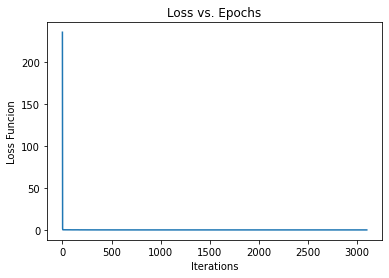

In [55]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

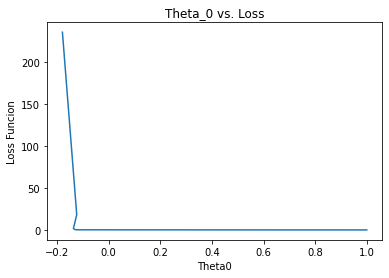

In [56]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

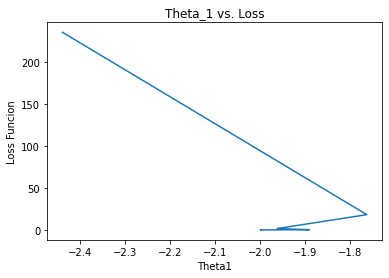

In [57]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

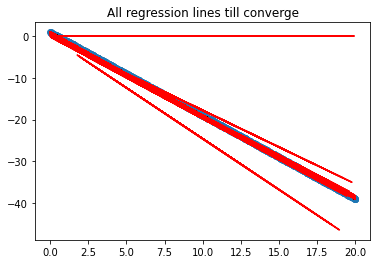

In [58]:
plt.scatter(x,y,label='observed data')
for i in range(len(y_predict_list)):
    plt.plot(x_list[i],y_predict_list[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

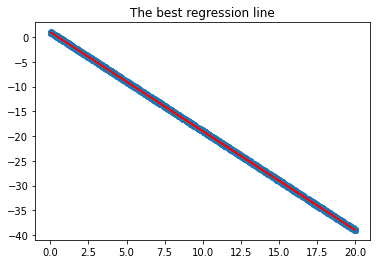

In [59]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

In [60]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,x_list=miniBatchGD(x,y,0.01,64,100)
print(f"all theta0 through all updates : \n {theta0_list}")
print(f"all theta1 through all updates : \n {theta1_list}")
print(f"The loss function through updates : \n {loss_list}")
print(f"The hyposthesis output for all updates : \n {y_predict_list}")
print(f"The optimum theta_0 = {theta_0}")
print(f"The optimum theta_1 = {theta_1}")

all theta0 through all updates : 
 [-0.18339444392547918, -0.12292891446594448, -0.14735027572776146, -0.13290623089148398, -0.13448839158334286, -0.12927785168999517, -0.12771440822723165, -0.12453092493899784, -0.12183541832822972, -0.11887851131229138, -0.11645475734641528, -0.11378494029104169, -0.11037695389668369, -0.10763610182979212, -0.1047900990471983, -0.101663513687405, -0.0999599785341043, -0.09696104861143552, -0.09390440013915756, -0.09167048893088675, -0.08826740086377868, -0.08618277237950185, -0.08342526464242096, -0.08067562547317728, -0.07788510437766122, -0.07552710736661106, -0.07296530283834314, -0.06967847941371186, -0.06703905707996788, -0.0642970532476946, -0.06128516699239157, -0.059644037741856656, -0.05675504032247771, -0.053810418461795795, -0.0516583871192646, -0.048380028720785624, -0.046371806744723396, -0.04371536749862593, -0.041066508684834316, -0.03837826623569879, -0.036106694967148426, -0.033638786152019845, -0.030472431971089134, -0.0279297502174

The hyposthesis output for all updates : 
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([ -7.163947  , -20.17411837, -37.32797521, -13.72442426,
       -34.87592546, -48.54172098, -29.94125855,  -8.77362406,
        -9.61893445, -18.82982675, -34.85670229, -17.40541528,
       -35.86169394, -39.27188849, -16.85546524, -42.53223998,
       -21.71965601, -14.37700897, -41.87880326, -47.23547485,
       -32.33886958, -11.65635692,  -5.75651216, -18.52880702,
        -7.81736803, -27.90215872, -42.80036243, -22.18000232,
        -7.49287431, -39.11852432, -17.57811807, -29.47933978,
       -41.67549051, -28.80776954, -43.05077555, -43.34849236,
       -27.06577192, -13.40976837, -39.23342163,  -6.87988966,
       -24.08211853, -47.73538902, -20.8

In [61]:
y_predict=theta_0+theta_1*x
y_mean=np.mean(y)
ss_tot=sum((y-y_mean)**2)
ss_res=sum((y-y_predict)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  0.999998633406674


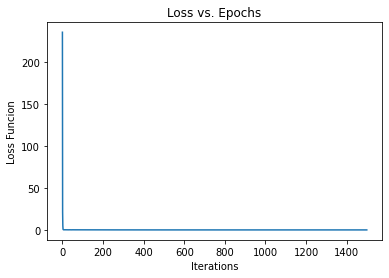

In [62]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

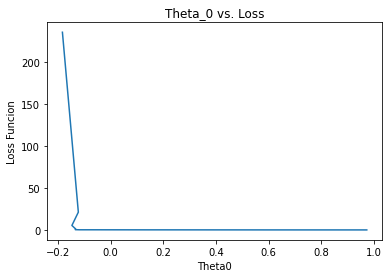

In [63]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

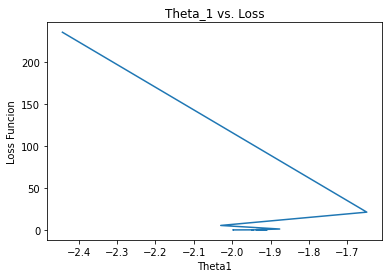

In [64]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

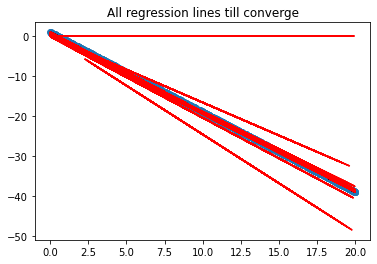

In [65]:
plt.scatter(x,y,label='observed data')
for i in range(len(y_predict_list)):
    plt.plot(x_list[i],y_predict_list[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

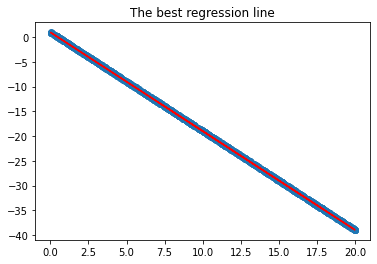

In [66]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

## Stochastic GD

#### **Step_13**: Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [67]:
def stochasticGD(x,y,alpha,epochs):
    theta_0=0
    theta_1=0
    theta0_list=[]
    theta1_list=[]
    cost_func=0
    loss_list=[]
    y_predict=[]
    y_predict_list=[]
    x_list=[]
    for i in range(epochs): 
        for j in range(len(x)): # this is number of all data points and number of updates for each epoch
            y_predict = theta_0 + theta_1 * x[j]
            y_predict_list.append(y_predict)
            x_list.append(x[j])
            theta0_grd = 2*np.sum(y_predict - y[j])
            theta1_grd = 2*np.sum((y_predict - y[j]) * x[j])
            theta_0 = theta_0 - alpha * theta0_grd
            theta0_list.append(theta_0)
            theta_1 = theta_1 - alpha * theta1_grd
            theta1_list.append(theta_1)
            cost_func=(y_predict-y[j])**2
            loss_list.append(cost_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,x_list

In [68]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,x_list=stochasticGD(x,y,0.001,10)
print(f"all theta0 through all updates : \n {theta0_list}")
print(f"all theta1 through all updates : \n {theta1_list}")
print(f"The loss function through updates : \n {loss_list}")
print(f"The hyposthesis output for all updates : \n {y_predict_list}")
print(f"The optimum theta_0 = {theta_0}")
print(f"The optimum theta_1 = {theta_1}")

all theta0 through all updates : 
 [-0.026665551141865685, -0.06129024818623385, -0.06348515844997568, -0.11101081685174585, -0.11166329840001334, -0.1206511884016573, -0.1274619389080432, -0.14064780892587297, -0.14893375178355678, -0.15231483177214056, -0.15342711770433023, -0.15200808516345107, -0.15124286180327706, -0.15036102278126875, -0.1492660420065637, -0.14745684077938645, -0.14524758765706125, -0.14737953250948024, -0.14838634214875313, -0.1461258028330896, -0.14519129889020518, -0.14330016752970096, -0.14354115827088654, -0.1435179466920492, -0.14241400587004235, -0.14069632103260166, -0.1408535311211508, -0.13921412104470857, -0.13716680894878253, -0.13692505474342023, -0.13845826191893212, -0.13780354178467, -0.1373078762552236, -0.13553549459730302, -0.13416587862746385, -0.13314517066194004, -0.13132773130957454, -0.12978663431986628, -0.12918517602176965, -0.1312999202383195, -0.13055363638135334, -0.12983606971073602, -0.12789227209347487, -0.12864524971095675, -0.127

In [69]:
y_predict=theta_0+theta_1*x
y_mean=np.mean(y)
ss_tot=sum((y-y_mean)**2)
ss_res=sum((y-y_predict)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  0.999999897546761


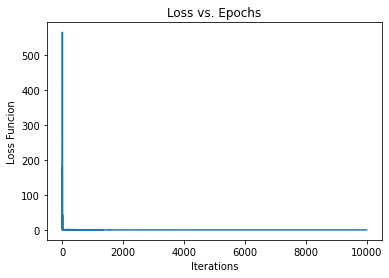

In [70]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

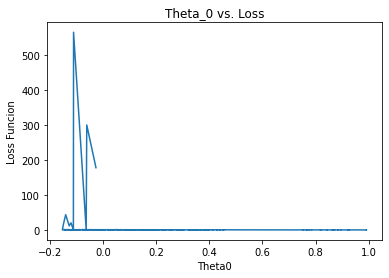

In [71]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

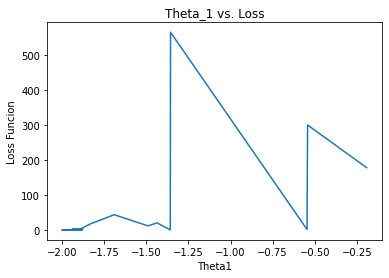

In [72]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

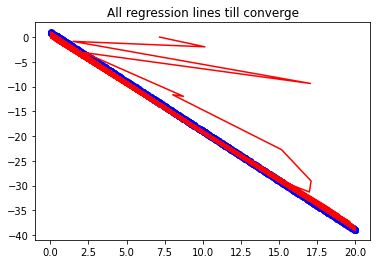

In [73]:
plt.scatter(x,y,label='observed data',color='blue')
plt.plot(x_list,y_predict_list,color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

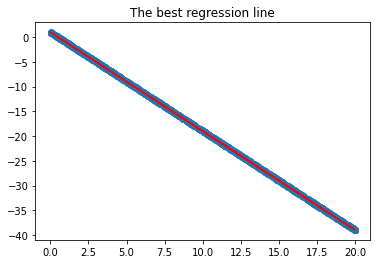

In [74]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

In [75]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,x_list=stochasticGD(x,y,0.001,2)
print(f"all theta0 through all updates : \n {theta0_list}")
print(f"all theta1 through all updates : \n {theta1_list}")
print(f"The loss function through updates : \n {loss_list}")
print(f"The hyposthesis output for all updates : \n {y_predict_list}")
print(f"The optimum theta_0 = {theta_0}")
print(f"The optimum theta_1 = {theta_1}")

all theta0 through all updates : 
 [-0.026665551141865685, -0.06129024818623385, -0.06348515844997568, -0.11101081685174585, -0.11166329840001334, -0.1206511884016573, -0.1274619389080432, -0.14064780892587297, -0.14893375178355678, -0.15231483177214056, -0.15342711770433023, -0.15200808516345107, -0.15124286180327706, -0.15036102278126875, -0.1492660420065637, -0.14745684077938645, -0.14524758765706125, -0.14737953250948024, -0.14838634214875313, -0.1461258028330896, -0.14519129889020518, -0.14330016752970096, -0.14354115827088654, -0.1435179466920492, -0.14241400587004235, -0.14069632103260166, -0.1408535311211508, -0.13921412104470857, -0.13716680894878253, -0.13692505474342023, -0.13845826191893212, -0.13780354178467, -0.1373078762552236, -0.13553549459730302, -0.13416587862746385, -0.13314517066194004, -0.13132773130957454, -0.12978663431986628, -0.12918517602176965, -0.1312999202383195, -0.13055363638135334, -0.12983606971073602, -0.12789227209347487, -0.12864524971095675, -0.127

In [76]:
y_predict=theta_0+theta_1*x
y_mean=np.mean(y)
ss_tot=sum((y-y_mean)**2)
ss_res=sum((y-y_predict)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  0.9996659147202658


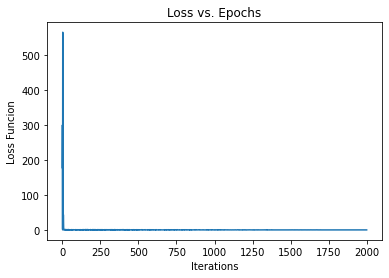

In [77]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

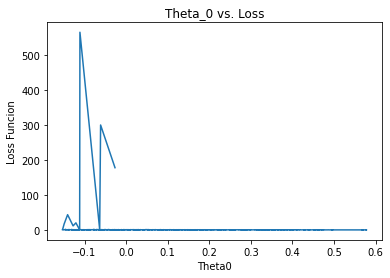

In [78]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

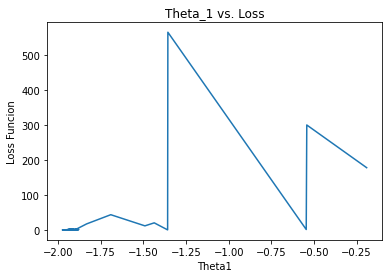

In [79]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

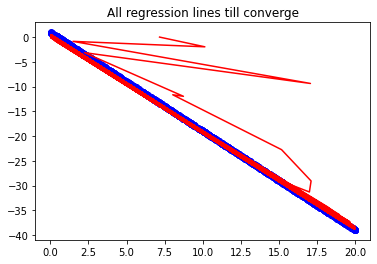

In [80]:
plt.scatter(x,y,label='observed data',color='blue')
plt.plot(x_list,y_predict_list,color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

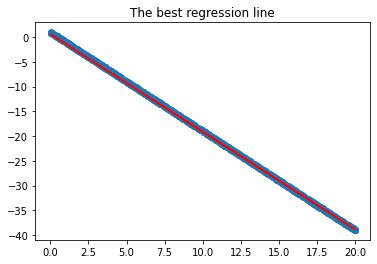

In [81]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()